__DSCB230 Sommersemster 2023__
# Hausarbeit - Datenauswertung am Beispiel eines Business-Anwendungsfalls

## Lernziele
1. Einblick in die Arbeitsweise agiler Projekte
2. Erfahrungen in der arbeitsteiligen Gruppenarbeit
3. Erheben und Realisieren von Anforderungen
4. Durchführen einer Datenauswertung
5. Präsentieren der Ergebnisse mit anschließendem fachlichen Gedankenaustausch (Kolloquium)

## Lehrinhalte
1. Business Case finden
2. Datenerfassung und Data Engineering
3. Datenmodellierung
4. Datenvisualisierung

## Ablauf
- Gruppeneinteilung
- Kick-off
- Statusmeetings 1-4
- Präsentation, Lessons Learned, Abgabe in ILIAS

### Kick-off (Projekt-Start)

Ziele: Lernziele besprechen. Erwartungen klarstellen. Durchführung besprechen.

### Statusmeetings (Sprint-Reviews)

Ziel: Es geht hauptsächlich um die Art und Weise der Zusammenarbeit, um Herausforderungen und Verbesserungsmöglichkeiten.

__Leitfragen:__
- Dinge, die gut gelungen sind.
- Dinge, die weniger gut gelaufen sind.
- Dinge, die man direkt stoppen sollte.
- Aspekte, die man ausprobieren könnte.

### Lessons Learned (Projekt-Review)

Ziele: Gewonnene Erkenntnisse für die Beurteilung der Arbeitsergebnisse festhalten.

Vorbereitung: Die Gruppe setzt sich zusammen, um wertvolle Erfahrungen zu identifizieren, sie zu analysieren und aus ihnen zu lernen.

__Leitfragen:__
- Was waren die angenehmsten Dinge?
- Welches Problem bzw. welche Probleme sind aufgetreten?
- Wie wurde mit Problemen und Unklarheiten umgegangen?
- Welche Lösung wurde verwendet?
- Welche Probleme konnten, nach eigenem Ermessen, besonders gut gelöst werden?
- Welche Ergebnisse der Datenauswertung waren überraschend?
- Welche Erkenntnisse konnten durch die Datenauswertung gewonnen werden?
- Welche ihrer Erwartungen an die Erkenntnisse der Datenauswertung weichen ab?
- Wie bewerten Sie selbst ihre Ergebnisse?
- Welche Erwartung an die Hausarbeit wurde nicht erfüllt?

## Aufgabenstellung

- Führen Sie eine Datenauswertung durch.
- Orientieren Sie sich an den Beispielen und den Übungen aus der Vorlesung.
- Dokumentieren Sie Ihre Arbeit in diesem Jupter Notebook. Abweichungen in andere Tools oder Anwendungen sind in Absprache mit dem Dozent möglich.
- Verwenden Sie die [Markdown](https://www.markdownguide.org/cheat-sheet/)-Syntax, um Ihre Arbeit leserlich zu gestalten.

## Abschlusspräsentation

- Termine
- Dauer ca. 15 min
- Ablauf:
    - Gruppe präsentiert ihre Datenauswertung im Plenum
    - Mündliche Wiedergabe der __vorbereiteten__ Lessons Learned
    - Upload aller Dokumete in ILIAS als Zip-Archiv  `DSCB230_SoSe_2023_Gruppenname.zip`


## Bewertung

Maximal 9 Punkte (10% der Klausurpunkte) als Startwert für die Klausur. Die Punkte erhalten alle Gruppenmitglieder. Sollte eine differenzierte Bewertung gewünscht sein, sprechen Sie bitte den Dozent an.

## Eichhörnchen im Central Park New York
Eichörnchen unter der Lupe

### Business Case

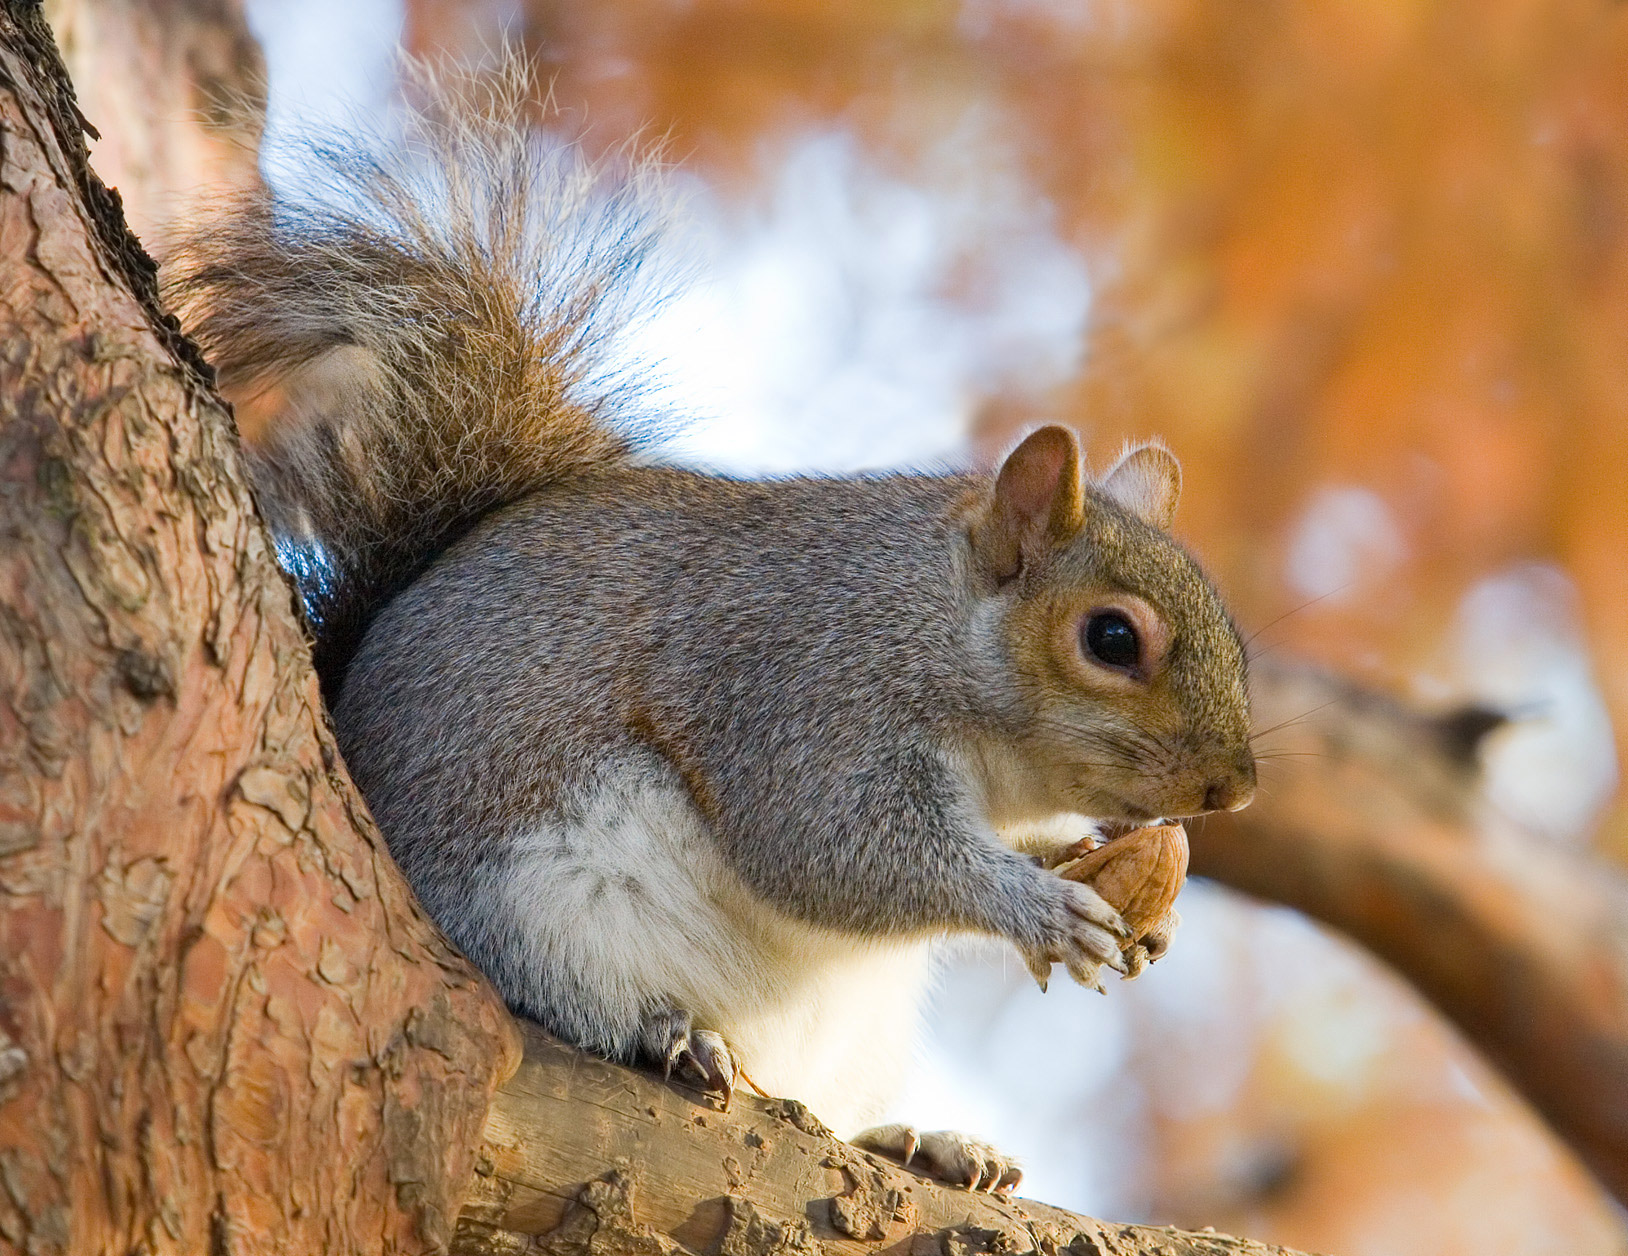
Eichhörnchen im Central Park (New York)  
Verhalten des Eastern gray" (Sciurus carolinensis).  
Fragestellungen:  
- "Gibt es bzw. wo befinden sich die zutraulichen Eichhörchen im Central Park? " 
- "Gibt es bzw. wo befinden sich aggressive Eichhörnchen im Central Park?"
- Themen die bei der Analyse entstanden sind

### Datenerfassung / Data Engineering / Datenmodellierung

Sekundärstatistik / Sekundärerhebung  
https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

#### Aufbau des Datensatzes

Spaltenname | Inhalt | Type |
------ | ------ |------ |
**X** | **Longitude coordinate for squirrel sighting point** |**Number**|
**Y** |**Latitude coordinate for squirrel sighting point**|**Number**|
Unique Squirrel ID | Identification tag for each squirrel sightings. The tag is comprised of "Hectare ID" + "Shift" + "Date" + "Hectare Squirrel Number."|Plain Text|
Hectare| ID tag, which is derived from the hectare grid used to divide and count the park area. One axis that runs predominantly north-to-south is numerical (1-42), and the axis that runs predominantly east-to-west is roman characters (A-I).|Plain Text|
Shift| Value is either "AM" or "PM," to communicate whether or not the sighting session occurred in the morning or late afternoon. |Plain Text|
**Date**|**Concatenation of the sighting session day and month.**|**Plain Text**|
Hectare Squirrel Number| Number within the chronological sequence of squirrel sightings for a discrete sighting session.|Number|
Age|Value is either "Adult" or "Juvenile."|Plain Text|
**Primary Fur Color**|**Value is either "Gray," "Cinnamon" or "Black."**|**Plain Text**|
Highlight Fur Color|Discrete value or string values comprised of "Gray," "Cinnamon" or "Black."|Plain Text|
Combination of Primary and Highlight Color|A combination of the previous two columns; this column gives the total permutations of primary and highlight colors observed.|Plain Text|
Color notes|Sighters occasionally added commentary on the squirrel fur conditions. These notes are provided here.|Plain Text|
Location|Value is either "Ground Plane" or "Above Ground." Sighters were instructed to indicate the location of where the squirrel was when first sighted.|Plain Text|
Above Ground Sighter Measurement|For squirrel sightings on the ground plane, fields were populated with a value of “FALSE.”|Plain Text|
Specific Location|Sighters occasionally added commentary on the squirrel location. These notes are provided here.|Plain Text|
Running|Squirrel was seen running.|Checkbox|
Chasing|Squirrel was seen chasing another squirrel.|Checkbox|
Climbing|Squirrel was seen climbing a tree or other environmental landmark.|Checkbox|
Eating|Squirrel was seen eating.|Checkbox|
Foraging|Squirrel was seen foraging for food.|Checkbox|
**Other Activities**||**Plain Text**|
Kuks|Squirrel was heard kukking, a chirpy vocal communication used for a variety of reasons.|Checkbox|
Quaas|Squirrel was heard quaaing, an elongated vocal communication which can indicate the presence of a ground predator such as a dog.|Checkbox|
Moans|Squirrel was heard moaning, a high-pitched vocal communication which can indicate the presence of an air predator such as a hawk.|Checkbox|
Tail flags|Squirrel was seen flagging its tail. Flagging is a whipping motion used to exaggerate squirrel's size and confuse rivals or predators. Looks as if the squirrel is scribbling with tail into the air.|Checkbox|
Tail twitches|Squirrel was seen twitching its tail. Looks like a wave running through the tail, like a breakdancer doing the arm wave. Often used to communicate interest, curiosity.|Checkbox|
**Approaches**|**Squirrel was seen approaching human, seeking food.**|**Checkbox**|
**Indifferent**|**Squirrel was indifferent to human presence.**|**Checkbox**|
Runs from|Squirrel was seen running from humans, seeing them as a threat.|Checkbox|
**Other Interactions**|**Sighter notes on other types of interactions between squirrels and humans.**|**Plain Text**|
Lat/Long|Latitude and longitude|Point|

In [2]:
df = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv")
df.head()

X          Y Unique Squirrel ID Hectare Shift      Date   
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM  10142018  \
1 -73.968857  40.783783     21B-AM-1019-04     21B    AM  10192018   
2 -73.974281  40.775534     11B-PM-1014-08     11B    PM  10142018   
3 -73.959641  40.790313     32E-PM-1017-14     32E    PM  10172018   
4 -73.970268  40.776213     13E-AM-1017-05     13E    AM  10172018   

   Hectare Squirrel Number    Age Primary Fur Color Highlight Fur Color  ...   
0                        3    NaN               NaN                 NaN  ...  \
1                        4    NaN               NaN                 NaN  ...   
2                        8    NaN              Gray                 NaN  ...   
3                       14  Adult              Gray                 NaN  ...   
4                        5  Adult              Gray            Cinnamon  ...   

    Kuks  Quaas  Moans Tail flags Tail twitches  Approaches  Indifferent   
0  False  False  False      False         False       False        False  \
1  False  False  False      False         False       False        False   
2  False  False  False      False         False       False        False   
3  False  False  False      False         False       False        False   
4  False  False  False      False         False       False        False   

   Runs from  Other Interactions                                    Lat/Long  
0      False                 NaN  POINT (-73.9561344937861 40.7940823884086)  
1      False                 NaN  POINT (-73.9688574691102 40.7837825208444)  
2      False                 NaN  POINT (-73.97428114848522 40.775533619083)  
3       True                 NaN  POINT (-73.9596413903948 40.7903128889029)  
4      False                 NaN  POINT (-73.9702676472613 40.7762126854894)  

[5 rows x 31 columns]

In [3]:
df.dtypes

X                                             float64
Y                                             float64
Unique Squirrel ID                             object
Hectare                                        object
Shift                                          object
Date                                            int64
Hectare Squirrel Number                         int64
Age                                            object
Primary Fur Color                              object
Highlight Fur Color                            object
Combination of Primary and Highlight Color     object
Color notes                                    object
Location                                       object
Above Ground Sighter Measurement               object
Specific Location                              object
Running                                          bool
Chasing                                          bool
Climbing                                         bool
Eating                      

#### Datentypen anpassen

In [4]:
df["Date"] =  pd.to_datetime(df["Date"], format="%m%d%Y")

#### Hintergrundinformation

In [5]:
df = df.sort_values(by=['Date'])

In [6]:
display(df.head(1))
display(df.tail(1))

X          Y Unique Squirrel ID Hectare Shift       Date   
433 -73.970296  40.769793      7H-AM-1006-11     07H    AM 2018-10-06  \

     Hectare Squirrel Number    Age Primary Fur Color Highlight Fur Color   
433                       11  Adult              Gray            Cinnamon  \

     ...   Kuks  Quaas  Moans Tail flags Tail twitches  Approaches   
433  ...  False  False  False      False         False        True  \

     Indifferent  Runs from  Other Interactions   
433        False      False                 NaN  \

                                       Lat/Long  
433  POINT (-73.9702963056917 40.7697928730791)  

[1 rows x 31 columns]

X          Y Unique Squirrel ID Hectare Shift       Date   
250 -73.971974  40.769305      6G-PM-1020-02     06G    PM 2018-10-20  \

     Hectare Squirrel Number    Age Primary Fur Color Highlight Fur Color   
250                        2  Adult              Gray                 NaN  \

     ...   Kuks  Quaas  Moans Tail flags Tail twitches  Approaches   
250  ...  False  False  False      False         False       False  \

     Indifferent  Runs from  Other Interactions   
250         True      False                 NaN  \

                                       Lat/Long  
250  POINT (-73.9719735582476 40.7693045133578)  

[1 rows x 31 columns]

# Vom 6. Oktober 2018 bis 20. Oktober 2018 -> 2 Wochen

In [7]:
samples = []
samples_ind = []
for _ in range(10000):
    df_sample = df.sample(3023, replace=True)
    samples.append(df_sample["Approaches"].mean())
    samples_ind.append(df_sample["Indifferent"].mean())
    

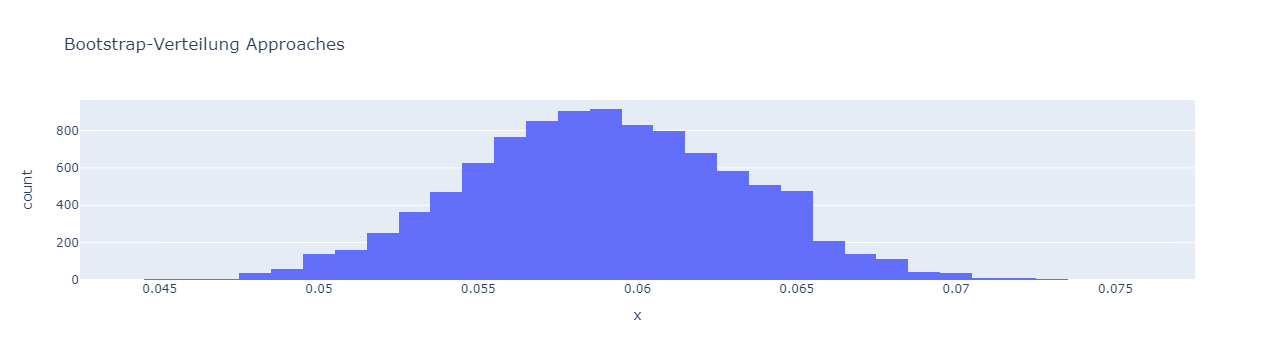

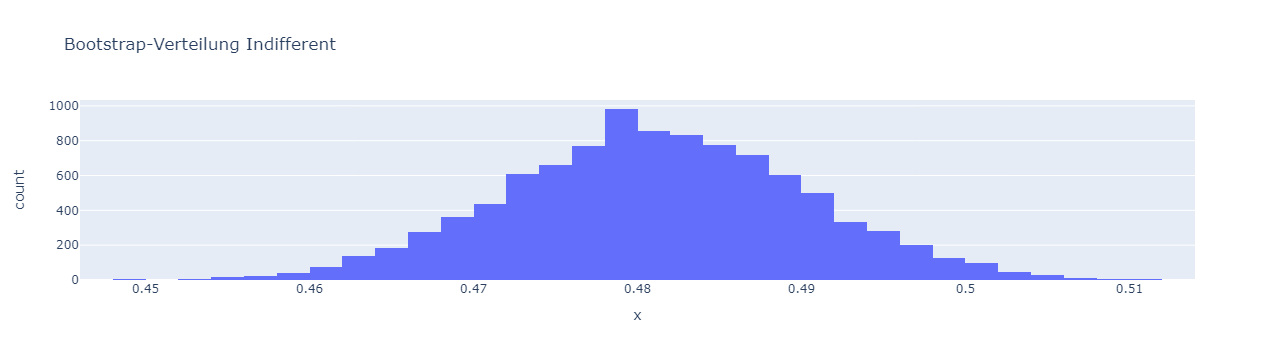

In [8]:
display(px.histogram(x=samples, title='Bootstrap-Verteilung Approaches',nbins= 50))
display(px.histogram(x=samples_ind, title='Bootstrap-Verteilung Indifferent',nbins= 50))

In [9]:
df['Approaches'].mean()

0.058881905391994706

In [10]:
quantile_025 = np.quantile(samples, .025)
print(f"2.5% Quantile: {quantile_025}")
quantile_975 = np.quantile(samples, .975)
print(f"97.5% Quantile: {quantile_975}")

2.5% Quantile: 0.05028117763810784
97.5% Quantile: 0.06748263314588157


In [11]:
quantile_025 = np.quantile(samples_ind, .025)
print(f"2.5% Quantile: {quantile_025}")
quantile_975 = np.quantile(samples_ind, .975)
print(f"97.5% Quantile: {quantile_975}")

2.5% Quantile: 0.4631161098246775
97.5% Quantile: 0.4988422097254383


#### Kompromiss Datenverwendung

95% Konfidenzintervall Approaches : 5,61% - 6,75%

95% Konfidenzintervall Indifferent : 46,31% - 49.68%

## Daten bereichern

#### Fehlendes Feld 'Aggressiv', woher?

Es gibt die Felder 'Other Interactions' und 'Other Activities'.  
Hier konnten die Beobachter einen beliebigen Text schreiben, vielleicht erfahren wir dies hier.

In [12]:
len(df)

3023

Das sind viele Zeilen zu prüfen... -> Filtern

In [13]:
df_other = df.loc[df['Other Interactions'].notnull() | df['Other Activities'].notnull(), ['Unique Squirrel ID','Other Activities','Other Interactions']]

In [14]:
len(df_other)

626

Mühsam per Hand den Text auswerten auf aggressives Verhalten.

In [15]:
df_other.to_csv('behaviour.csv')

In [16]:
df_agg = pd.read_csv('agg.csv')

In [17]:
df_agg

Unique Squirrel ID
0      4H-AM-1006-03
1      4H-AM-1006-04
2     36I-PM-1007-02
3     33I-AM-1008-05
4     41B-AM-1010-07
5     23B-PM-1012-06
6      1B-AM-1012-11
7     20B-PM-1013-04
8     37D-PM-1014-04

#### Neue Daten als neue Spalte einfügen

In [18]:
df['Aggressive'] = False

In [19]:
df.head(3)

X          Y Unique Squirrel ID Hectare Shift       Date   
433  -73.970296  40.769793      7H-AM-1006-11     07H    AM 2018-10-06  \
2765 -73.955164  40.790858     34H-PM-1006-03     34H    PM 2018-10-06   
252  -73.976225  40.775164     10A-AM-1006-03     10A    AM 2018-10-06   

      Hectare Squirrel Number       Age Primary Fur Color Highlight Fur Color   
433                        11     Adult              Gray            Cinnamon  \
2765                        3       NaN              Gray               White   
252                         3  Juvenile          Cinnamon                 NaN   

      ...  Quaas  Moans Tail flags Tail twitches Approaches  Indifferent   
433   ...  False  False      False         False       True        False  \
2765  ...  False  False      False          True      False        False   
252   ...  False  False      False         False      False        False   

      Runs from  Other Interactions   
433       False                 NaN  \
2765      False                 NaN   
252       False                 NaN   

                                        Lat/Long  Aggressive  
433   POINT (-73.9702963056917 40.7697928730791)       False  
2765   POINT (-73.9551639847466 40.790858199891)       False  
252    POINT (-73.9762246600197 40.775164077652)       False  

[3 rows x 32 columns]

Füllen der True Werte bei dem die "Aggressiv" sind

In [20]:
df.loc[df['Unique Squirrel ID'].isin(df_agg['Unique Squirrel ID'].values.tolist()),'Aggressive'] = True

In [21]:
df[['Unique Squirrel ID', 'Other Activities', 'Other Interactions']].loc[df['Aggressive'].eq(True)]

Unique Squirrel ID                             Other Activities   
2426      4H-AM-1006-03    met #4 while foraging and briefly tussled  \
751       4H-AM-1006-04    met #3 while foraging and briefly tussled   
2669     36I-PM-1007-02                                          NaN   
1482     33I-AM-1008-05                                          NaN   
184      41B-AM-1010-07                                          NaN   
3010     23B-PM-1012-06                                          NaN   
1000      1B-AM-1012-11                          fighting w/ pigeons   
2531     20B-PM-1013-04  chased a bird carrying massive wad of grass   
103      37D-PM-1014-04                         chasing (a chipmunk)   

                    Other Interactions  
2426                               NaN  
751                                NaN  
2669           chased birds (blue jay)  
1482  nearly dropped shell on my head!  
184                               mad!  
3010                          scolding  
1000                               NaN  
2531                               NaN  
103                                NaN

#### Aufgekommene Fragestellung: Gibt es einen Zusammenhang zwischen Primäre Fellfarbe und Verhalten?

In [22]:
df_colors  = df.groupby('Primary Fur Color').agg(Anzahl_Fellfarbe=('Primary Fur Color','count'), Anzahl_Approaches=('Approaches','sum'))
df_colors

Anzahl_Fellfarbe  Anzahl_Approaches
Primary Fur Color                                     
Black                           103                  6
Cinnamon                        392                 44
Gray                           2473                126

Da fehlen Zeilen? Neue unerwartete Erkenntnisse zur Seltenheit von Fellfarben!

In [23]:
df_colors['Anzahl_Fellfarbe'].sum()

2968

<Axes: >

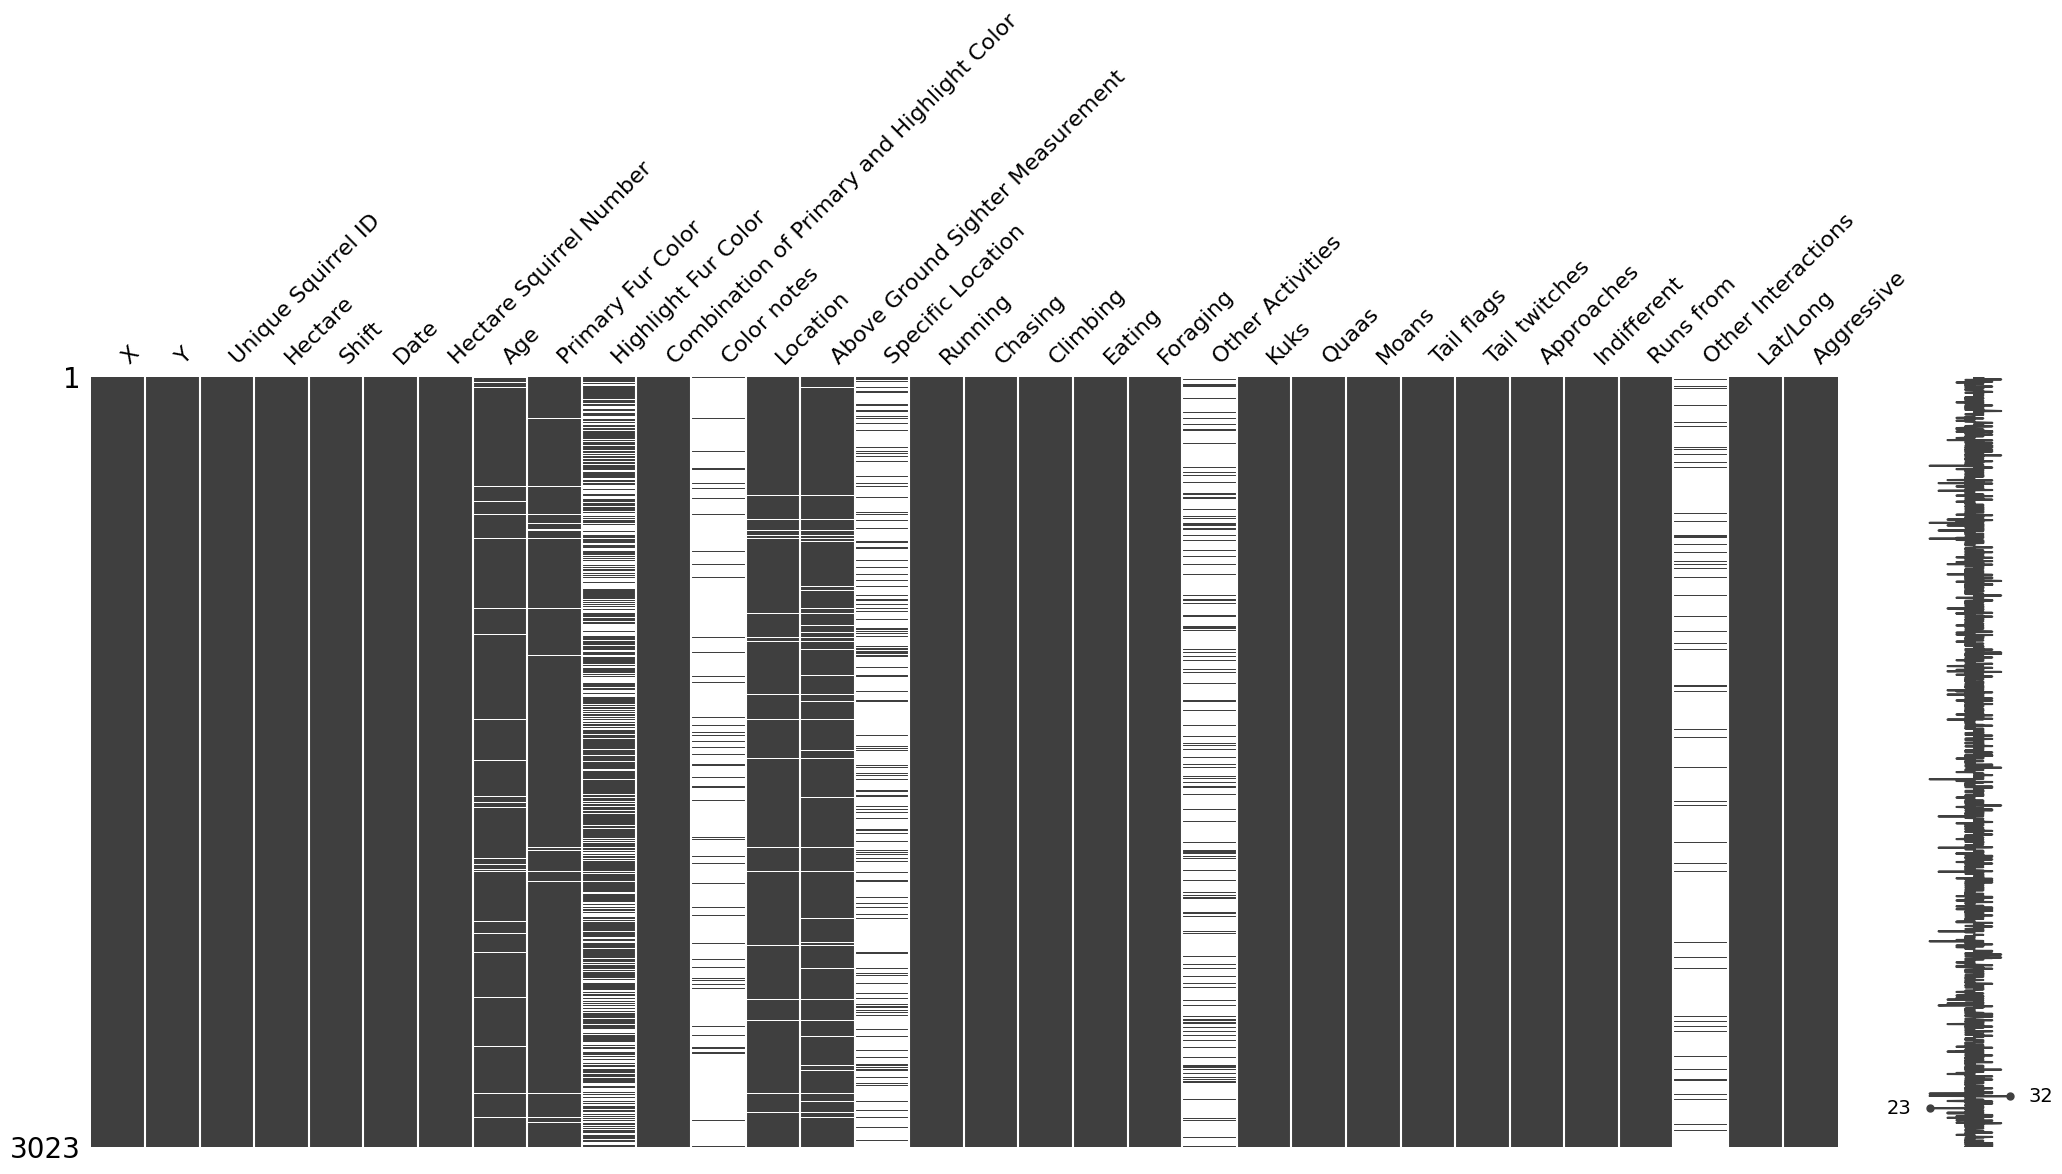

In [24]:
import missingno
missingno.matrix(df)

Woher kommen die Lücken?

https://bybio.wordpress.com/2020/04/30/of-squirrel-tails-and-coat-colors/

#### Mit den neuen Daten rechnen

Was ist denn das Verhältnis der Fellfarben?

In [25]:
df_colors['%-Anteil Fellfarbe']  = df_colors['Anzahl_Fellfarbe']*100 / df_colors['Anzahl_Fellfarbe'].sum()

In [26]:
df_colors

Anzahl_Fellfarbe  Anzahl_Approaches  %-Anteil Fellfarbe
Primary Fur Color                                                         
Black                           103                  6            3.470350
Cinnamon                        392                 44           13.207547
Gray                           2473                126           83.322102

In [27]:
df_colors['%-Anteil Approach']  = df_colors['Anzahl_Approaches']*100 / df_colors['Anzahl_Fellfarbe']

In [28]:
df_colors

Anzahl_Fellfarbe  Anzahl_Approaches  %-Anteil Fellfarbe   
Primary Fur Color                                                            
Black                           103                  6            3.470350  \
Cinnamon                        392                 44           13.207547   
Gray                           2473                126           83.322102   

                   %-Anteil Approach  
Primary Fur Color                     
Black                       5.825243  
Cinnamon                   11.224490  
Gray                        5.095026

In [29]:
df_colors = df_colors.reset_index()

In [30]:
df_colors

Primary Fur Color  Anzahl_Fellfarbe  Anzahl_Approaches  %-Anteil Fellfarbe   
0             Black               103                  6            3.470350  \
1          Cinnamon               392                 44           13.207547   
2              Gray              2473                126           83.322102   

   %-Anteil Approach  
0           5.825243  
1          11.224490  
2           5.095026

### Datenvisualisierung

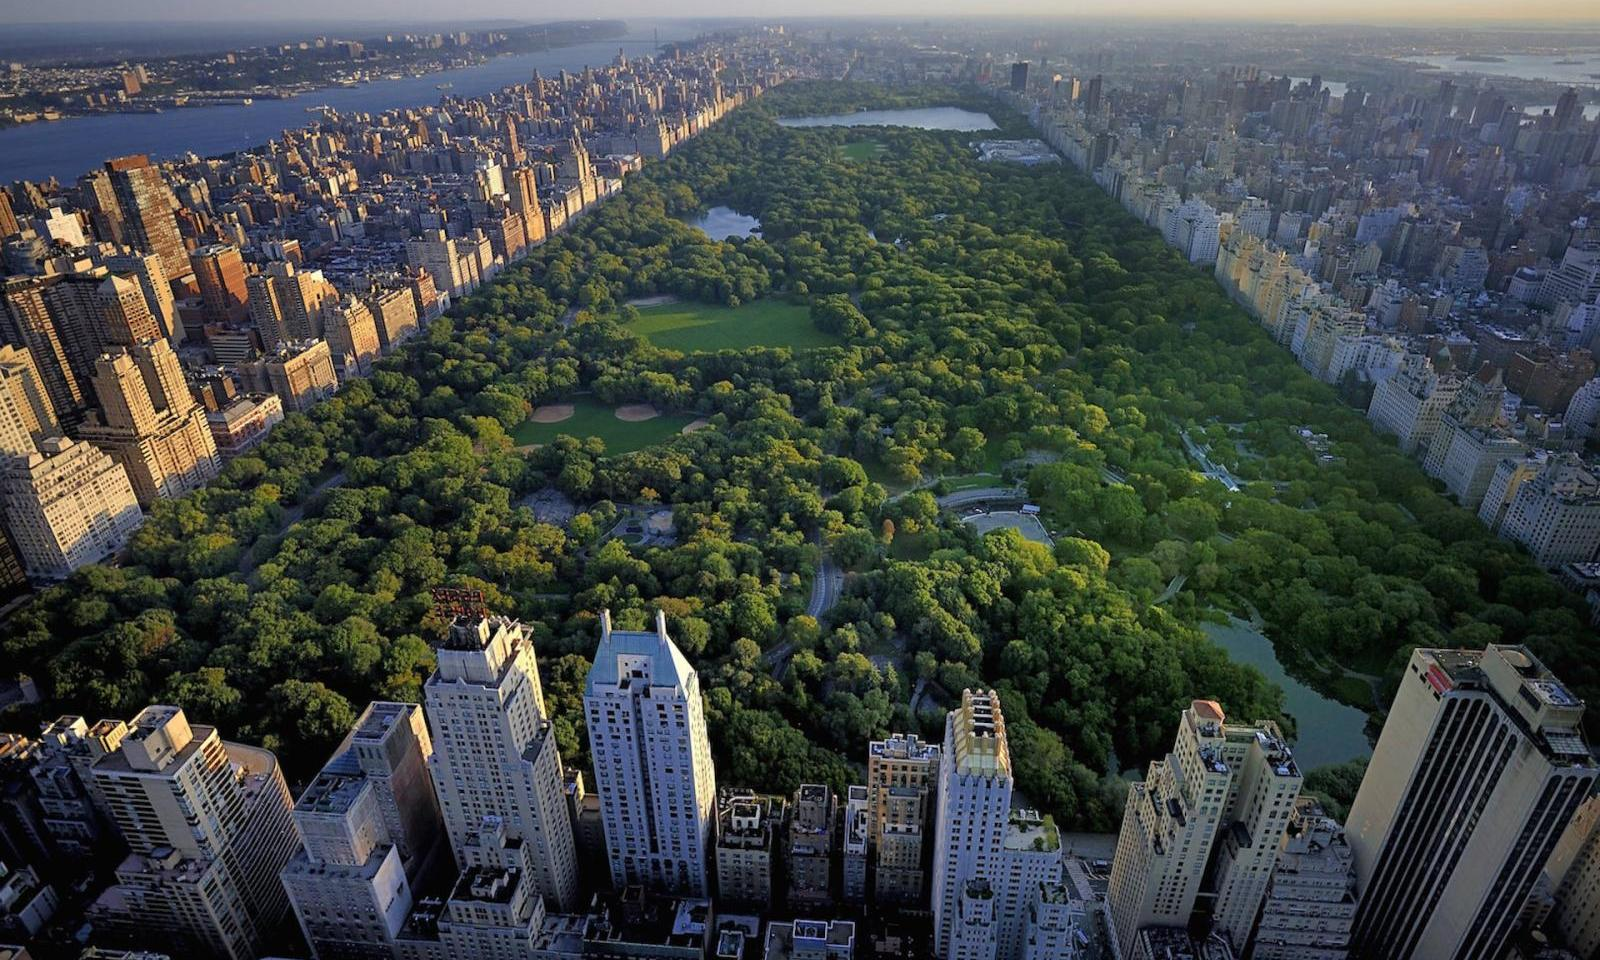  
Das Gebiet der Beobachtung

In [31]:
import plotly.express as px
import folium
from folium.plugins import HeatMap

In [32]:
df_agg = df.loc[df['Aggressive'].eq(True)]
m1 = folium.Map(location=[df.Y[0],df.X[0]],zoom_start=15)
for index, row in df_agg.iterrows():
    folium.Marker(location=[row["Y"], row["X"]],popup= row['Other Interactions']).add_to(m1)

In [33]:
m1

In [34]:
display(len(df))
df_app = df.loc[df['Approaches'].eq(True)]
display(len(df_app))
m2 = folium.Map(location=[df.Y[0],df.X[0]],zoom_start=15)
for index, row in df_app.iterrows():
    folium.Marker(location=[row["Y"], row["X"]],popup= row['Other Interactions']).add_to(m2)

3023

178

In [35]:
m2

In [36]:
m3 = folium.Map(location=[df.Y[0],df.X[0]],zoom_start=15)

In [52]:
df_coords = df_app[['Y','X']].values
display(type(df_coords))
HeatMap(df_coords).add_to(m3)
m3

numpy.ndarray

In [38]:
m4 = folium.Map(location=[df.Y[0],df.X[0]],zoom_start=15)

In [39]:
df_coords = df[['Y','X']].values
HeatMap(df_coords).add_to(m4)
m4

In [40]:
df_colors

Primary Fur Color  Anzahl_Fellfarbe  Anzahl_Approaches  %-Anteil Fellfarbe   
0             Black               103                  6            3.470350  \
1          Cinnamon               392                 44           13.207547   
2              Gray              2473                126           83.322102   

   %-Anteil Approach  
0           5.825243  
1          11.224490  
2           5.095026

#### Anteil Fellfarben vom 'Grey Eastern'

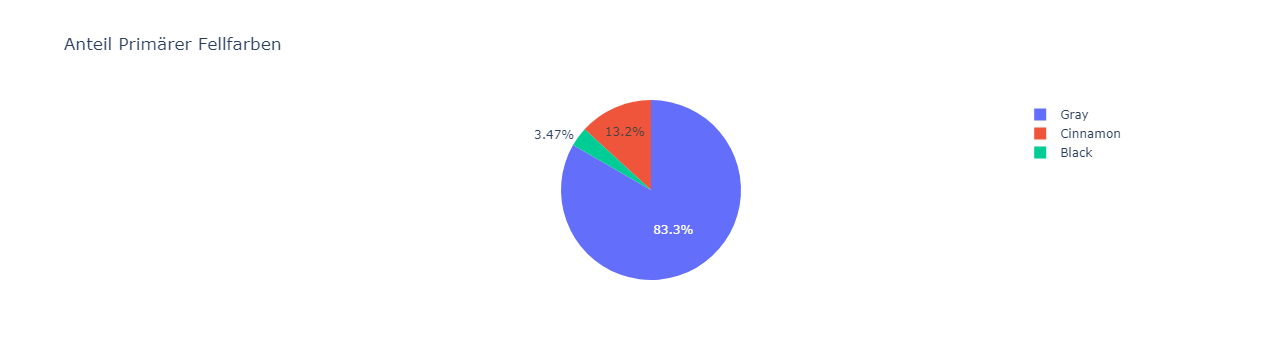

In [41]:
px.pie(df_colors, values = '%-Anteil Fellfarbe', names = 'Primary Fur Color', title='Anteil Primärer Fellfarben')

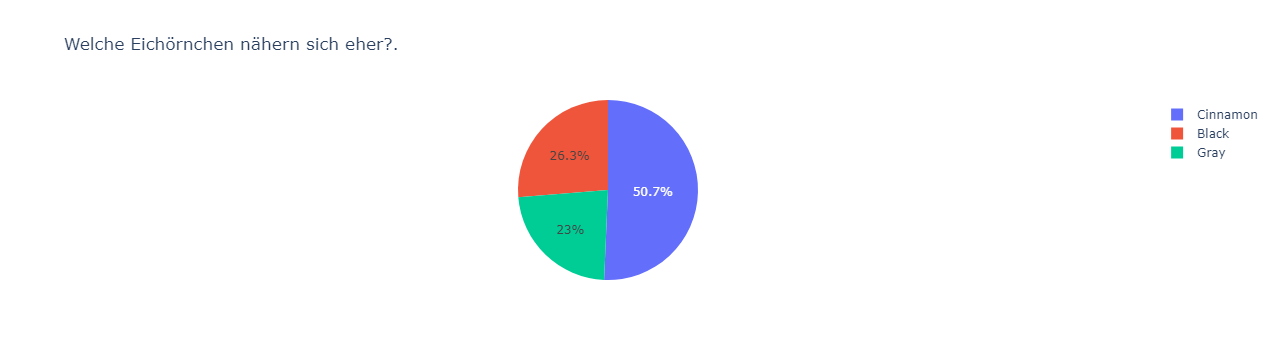

In [42]:
px.pie(df_colors, values = '%-Anteil Approach', names = 'Primary Fur Color', title='Welche Eichörnchen nähern sich eher?.')

In [43]:
df_aggressive = df.loc[df['Aggressive'].eq(True)]

In [44]:
df_aggressive = df_aggressive.groupby('Primary Fur Color',as_index=False).agg(Anzahl_Aggressiv = ('Aggressive','sum'))

In [45]:
df_aggressive

Primary Fur Color  Anzahl_Aggressiv
0             Black                 1
1          Cinnamon                 2
2              Gray                 5

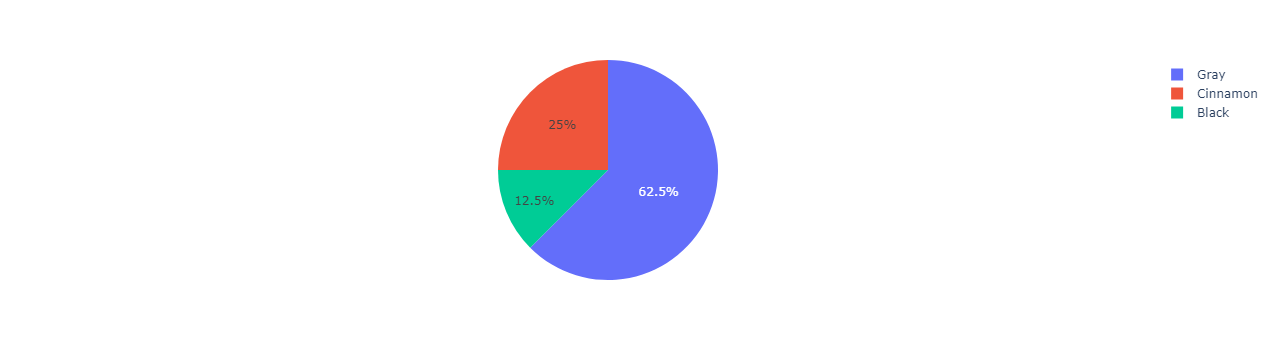

In [53]:
px.pie(df_aggressive, values='Anzahl_Aggressiv', names ='Primary Fur Color').show()

Vorsicht mit der Interpretation von Daten....

## Lessons Learned

- Eichörnchen haben sehr selten aggressive Tendenzen ( 9 von 3023 = 0,3%)
- Es gibt keinen bestimmten Ort wo sich die aggressiven Eichhörnchen häufen
- Die seltenste Eichhörhnchen sind schwarze Eichhörnchen(3,5%) gefolgt von cinammon Eichörnchen(13,2%) und den grauen (83,3%)
- Eichhörnchen die zutraulisch sind, befinden oder gehen in die Nähe wo sich Menschen aufhalten
- Die Wahrscheinlichkeit ein zutraulisches Schwarzes Eichörnchen zu treffen ist 3.47% * 5.83% = 0,202%

### Was ist gut gelaufen?

- Das erstellen von Heatmaps ging sehr gut
- Die Daten waren leicht verfügbar
- Neue Fragestellungen die aufgetreten sind (Fellfarbe)
- Wir haben Ergebnisse zu den Businesscases

### Was ist nicht so gut gelaufen?

#### Viele Stolpersteine

###### Berechnung der Konfidenzintervall mit Bootstrapping

In [47]:
#Die Funktionen machen das gleich.... oder?
display(df["Indifferent"].value_counts(normalize=True)[1])
display(df["Indifferent"].mean())

0.4809791597750579

0.4809791597750579

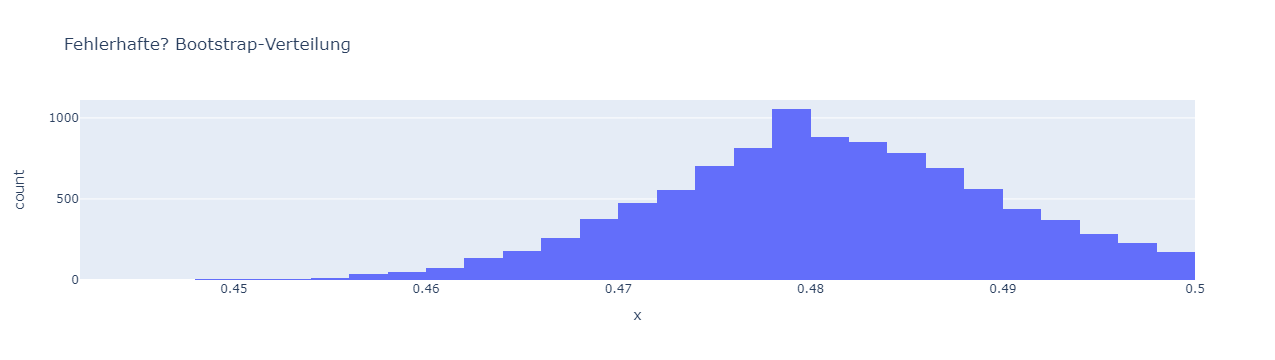

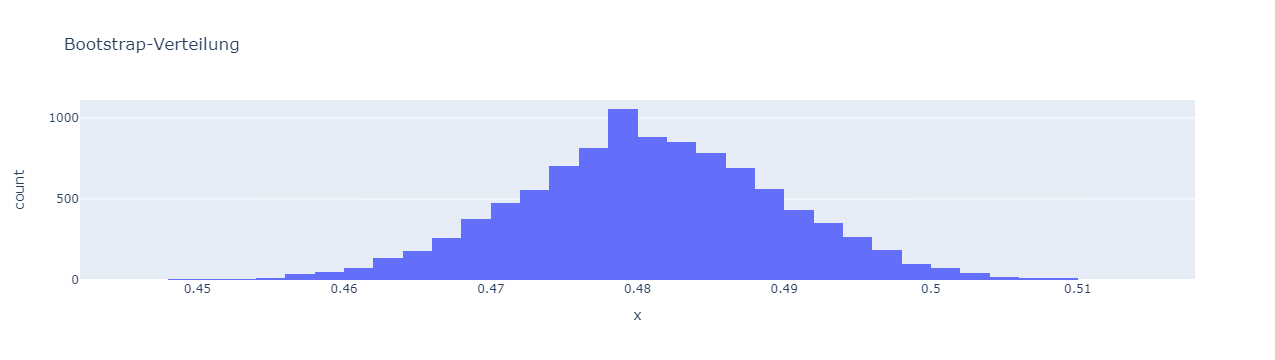

In [48]:
samples = []
samples_good=[]
for _ in range(10000):
    df_sample = df.sample(3023, replace=True)
    samples.append(df_sample["Indifferent"].value_counts(normalize=True)[1])
    samples_good.append(df_sample["Indifferent"].mean())

display(px.histogram(x=samples, title='Fehlerhafte? Bootstrap-Verteilung',nbins= 50))
display(px.histogram(x=samples_good, title='Bootstrap-Verteilung',nbins= 50))

# Behandeln von unpassenen Datentypen

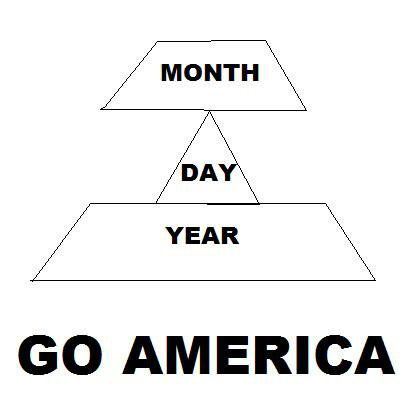

#### Die Daten genau angucken.... Vielleicht gibt es unerwartete Einträge die man lieber nicht haben möchte in der Auswertung.